   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


2024-07-28 02:28:42.259122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 02:28:42.259275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 02:28:42.418402: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


GPU is available
Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_S

I0000 00:00:1722133790.591209     123 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1358/1358 [==============================] - ETA: 0s - loss: 0.7284 - accuracy: 0.8186

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1358/1358 [==============================] - 317s 222ms/step - loss: 0.7284 - accuracy: 0.8186 - val_loss: 0.2488 - val_accuracy: 0.9492
Epoch 2/20
1358/1358 [==============================] - 267s 197ms/step - loss: 0.2734 - accuracy: 0.9433 - val_loss: 0.2176 - val_accuracy: 0.9611
Epoch 3/20
1358/1358 [==============================] - 267s 197ms/step - loss: 0.1976 - accuracy: 0.9662 - val_loss: 0.1709 - val_accuracy: 0.9751
Epoch 4/20
1358/1358 [==============================] - 267s 196ms/step - loss: 0.1635 - accuracy: 0.9756 - val_loss: 0.1684 - val_accuracy: 0.9738
Epoch 5/20
1358/1358 [==============================] - 274s 202ms/step - loss: 0.1456 - accuracy: 0.9811 - val_loss: 0.2306 - val_accuracy: 0.9649
Epoch 6/20
1358/1358 [==============================] - 274s 202ms/step - loss: 0.1397 - accuracy: 0.9833 - val_loss: 0.1771 - val_accuracy: 0.9732
Epoch 7/20
1358/1358 [==============================] - 266s 196ms/step - loss: 0.1191 - accuracy: 0.9881 - val_loss: 0.185

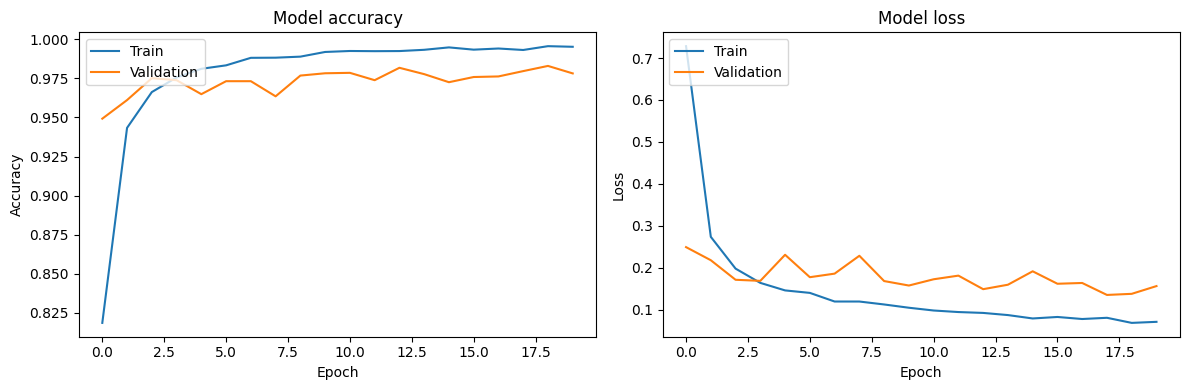

340/340 [==============================] - 47s 136ms/step
Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.02      0.02      0.02       126
                                 Apple___Black_rot       0.01      0.01      0.01       124
                          Apple___Cedar_apple_rust       0.02      0.02      0.02        55
                                   Apple___healthy       0.03      0.03      0.03       329
                               Blueberry___healthy       0.05      0.05      0.05       300
          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       210
                 Cherry_(including_sour)___healthy       0.02      0.02      0.02       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       102
                       Corn_(maize)___Common_rust_       0.02      0.02      0.02       2

In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install wurlitzer
!pip install scikit-learn

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU not available")

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Data augmentation to improve generalization
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomWidth(0.3),
    tf.keras.layers.RandomHeight(0.3),
    tf.keras.layers.RandomBrightness(0.3),
])

def load_data(train_dir, batch_size, img_size):
    # Data augmentation for training data
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=30,
        zoom_range=0.3,
        width_shift_range=0.3,
        height_shift_range=0.3,
        brightness_range=[0.7, 1.3]
    )

    # Only rescale for validation data
    val_datagen = ImageDataGenerator(
        rescale=1./255,
    )

    train_ds = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    val_ds = val_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    return train_ds, val_ds


def create_model(fine_tune_at=None):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    if fine_tune_at is not None:
        base_model.trainable = True
        # Freeze all the layers before the `fine_tune_at` layer
        for layer in base_model.layers[:fine_tune_at]:
            layer.trainable = False
    else:
        base_model.trainable = False  # Initially, freeze the base model

    # Correctly handle the output tensor from the base model
    x = base_model.output
    if isinstance(x, list):
        print("It's a list")
        x = x[0]  # Take the first tensor if the output is a list
    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.0001))(x)  # First dense layer with L2 regularization
    x = Dropout(0.3)(x)  # Dropout to reduce overfitting
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(x)  # Additional dense layer with L2 regularization
    x = Dropout(0.3)(x)  # Dropout to reduce overfitting
    output = Dense(38, activation='softmax')(x)  # 38 output classes

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

def train_and_fine_tune_model(model, train_ds, val_ds):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint = ModelCheckpoint('initial_model.h5', save_best_only=True, monitor='val_loss', mode='min')
    history = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[early_stopping, checkpoint])
   
    return history

def evaluate_model(model, test_ds):
    loss, accuracy = model.evaluate(test_ds, verbose=2)
    print(f"Testing set Accuracy: {accuracy}")
    return accuracy

def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

def compute_confusion_matrix(model, val_ds):
    # Predict the values from the validation dataset
    predictions = model.predict(val_ds)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = val_ds.classes
    class_labels = list(val_ds.class_indices.keys())
    
    # Print classification report
    print("Classification Report:\n", classification_report(true_classes, predicted_classes, target_names=class_labels))
    
    # Compute confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    print("Confusion Matrix:\n", cm)

TRAIN_DIR = "/kaggle/input/plantvillage-dataset/color"

train_ds, val_ds = load_data(TRAIN_DIR, BATCH_SIZE, IMG_SIZE)

for i in (train_ds.class_indices):
    print(i)

# Fine-tuning the last 4 layers
model = create_model(fine_tune_at=15)
history = train_and_fine_tune_model(model, train_ds, val_ds)
evaluate_model(model, val_ds)
plot_history(history)

# Compute and print confusion matrix
compute_confusion_matrix(model, val_ds)